# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
import tensorflow as tf
import sys

if tf.test.gpu_device_name() == '':
    print('You do not have a GPU available.')
else:
    print('You have a GPU available.')

You have a GPU available.


In [2]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [3]:
# Your code here
'''
Shape of the training dataset
50000 records of 
Color images (3 bytes) of size  (32 x 32)
'''
x_train.shape

(50000, 32, 32, 3)

In [4]:
'''
Shape of the testing dataset
10000 records of 
Color images (3 bytes) of size  (32 x 32)
'''
x_test.shape

(10000, 32, 32, 3)

In [5]:
# Shape of the target data for training
y_train.shape

(50000, 1)

In [6]:
# Shape of the target data for testing
y_test.shape

(10000, 1)

In [7]:
type(y_train)

numpy.ndarray

In [8]:
# min value
y_train.min()

0

In [9]:
# max value
y_train.max()

99

In [10]:
# Number of classes:
import numpy as np
np.unique(y_train).size

100

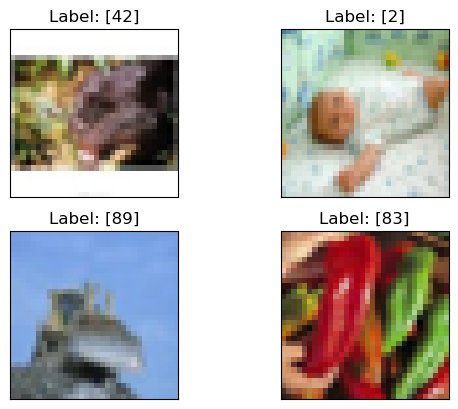

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Selecting 4 random indices
random_indices = np.random.choice(len(x_train), 4, replace=False)

# Creating a 2x2 grid plot
fig, axes = plt.subplots(2, 2)

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[random_indices[i]])
    ax.set_title(f"Label: {y_train[random_indices[i]]}")

    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [12]:
# Your code here
# Normalize the images so that they all have pixel values in the range [0, 1].
x_train = x_train / 255.0
x_test = x_test / 255.0

In [13]:
from tensorflow.keras.utils import to_categorical
# from sklearn.preprocessing import OneHotEncoder

# Convert the labels to one-hot encoded vectors.
print(f'Before one-hot encoding: {y_train[0]}')
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)
print(f'After one-hot encoding: {y_train[0]}')

Before one-hot encoding: [19]
After one-hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [14]:
from sklearn.model_selection import train_test_split

# Split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.
x_training, x_validation, y_training, y_validation = train_test_split(x_train, y_train, train_size=0.8, random_state=42)

## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, MaxPool2D, BatchNormalization

# Your code here
model = None
model = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPool2D(2,2),
    Dropout(0.3),
    
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D(2, 2),
    Dropout(0.3),
        
    Conv2D(256, (3, 3), activation='relu'),
    MaxPool2D(2, 2),
        
    Flatten(),
    
    Dense(256, activation='relu'),
    Dropout(0.3),

    Dense(100, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 128)         0

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> For image classification, categorical crossentropy is the most appropriate loss function. It quantifies the difference between the predicted probability distribution and the true labels, making it well-suited for multi-class problems.
- <b>Optimizer:</b> Adam is widely used for its efficient and adaptive learning rate adjustment. It combines the benefits of momentum and RMSprop, making it effective for large datasets and models with high computational complexity, such as those in image classification.

In [16]:
# from keras import optimizers

# Your code here
model.compile(
    loss = 'categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [17]:
# Your code here
'''
Let's start with 15 epochs to save time. We will be able to understand how well the model learns from the first epochs,
later we can increase the number of epochs if we see that the model is not prone to overfitting and increasing the number of epochs makes sense.
Adjusted to 100 epochs to allign with the Enhanced model.
'''
# Train the model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

history = model.fit(x_training, y_training, validation_data=(x_validation, y_validation), epochs=100, batch_size=32,
                    callbacks=[early_stopping, reduce_lr])
# history = model.fit(x_training, y_training, validation_data=(x_validation, y_validation), epochs=100, batch_size=32)

Epoch 1/100
1250/1250 [==============================] - 14s 9ms/step - loss: 4.1516 - accuracy: 0.0625 - val_loss: 3.7528 - val_accuracy: 0.1205 - lr: 0.0010
Epoch 2/100
1250/1250 [==============================] - 11s 9ms/step - loss: 3.6444 - accuracy: 0.1414 - val_loss: 3.3441 - val_accuracy: 0.1982 - lr: 0.0010
Epoch 3/100
1250/1250 [==============================] - 11s 9ms/step - loss: 3.3723 - accuracy: 0.1872 - val_loss: 3.1764 - val_accuracy: 0.2310 - lr: 0.0010
Epoch 4/100
1250/1250 [==============================] - 11s 9ms/step - loss: 3.1861 - accuracy: 0.2221 - val_loss: 3.0295 - val_accuracy: 0.2685 - lr: 0.0010
Epoch 5/100
1250/1250 [==============================] - 11s 9ms/step - loss: 3.0527 - accuracy: 0.2463 - val_loss: 2.9093 - val_accuracy: 0.2823 - lr: 0.0010
Epoch 6/100
1250/1250 [==============================] - 11s 9ms/step - loss: 2.9401 - accuracy: 0.2715 - val_loss: 2.8913 - val_accuracy: 0.2839 - lr: 0.0010
Epoch 7/100
1250/1250 [=======================

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 0.41
- <b>Other metric:</b> F1 Score
- <b>Reason for selection:</b> The F1 Score is ideal for classification problems where false positives and false negatives carry different costs, ensuring a nuanced evaluation of the model’s performance
- <b>Value of metric:</b> 0.41
- <b>Interpretation of metric value:</b> F1 score of 0.37 indicates that the model has relatively poor performance in terms of balancing precision and recall.

In [18]:
'''
CAN BE DELETED
'''
predicts = model.predict(x_test)
print(f'Type of response: {type(predicts)}')

313/313 [==============================] - 2s 4ms/step
Type of response: <class 'numpy.ndarray'>


In [19]:
'''
CAN BE DELETED
'''
print(predicts[0])

[3.29402006e-10 2.89289687e-06 5.08127341e-05 2.47725262e-03
 2.68451986e-03 3.36964586e-04 3.50539813e-05 4.42556717e-04
 4.03755624e-03 1.03051985e-04 6.40817871e-06 7.04299237e-05
 3.47038433e-02 1.87385122e-05 1.26685718e-05 1.46867824e-04
 5.61708646e-07 1.83618860e-03 4.12167254e-04 2.73781037e-03
 9.95547339e-07 1.03895845e-05 5.09933234e-05 7.66657286e-06
 3.00916290e-04 3.78274271e-05 9.02630482e-03 3.05422815e-03
 4.54032806e-06 1.14861764e-02 5.83050072e-01 2.13389844e-03
 3.59546184e-03 3.56068864e-04 2.19735739e-04 1.68950828e-06
 2.45687239e-08 1.00135966e-03 1.24027871e-03 3.96617834e-05
 6.54213596e-04 3.50069422e-05 2.44771059e-07 1.53882080e-08
 6.85552787e-03 3.76487384e-04 3.88802320e-04 2.27746182e-06
 4.15171788e-04 2.93335365e-03 2.50736539e-05 1.48899588e-07
 1.64384502e-07 6.69792743e-15 3.51823678e-06 5.58906980e-02
 2.79861968e-04 1.17752325e-05 5.47703879e-04 6.42294297e-03
 4.57695314e-05 3.05177468e-06 3.36799373e-11 2.77274808e-06
 5.77632818e-05 1.001917

In [20]:
'''
CAN BE DELETED
'''
print(f'The size of the response: {predicts.size}')
print(f'The shape of the response: {predicts.shape}')
print(f'The NDIM of the response: {predicts.ndim}')
print(f'The MAX of the response: {np.max(predicts[0]):.8f}')

The size of the response: 1000000
The shape of the response: (10000, 100)
The NDIM of the response: 2
The MAX of the response: 0.58305007


In [21]:
'''
CAN BE DELETED
'''
y_preds = np.argmax(predicts, axis=-1)
print(type(y_preds))
print(y_preds)

<class 'numpy.ndarray'>
[30 33 55 ... 51 78 70]


In [22]:
# Your code here
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np


# Predict results:
predicts = model.predict(x_test) # Numpy array of probabilities for all 100 classes (10000 samples)

y_preds = np.argmax(predicts, axis=-1) # Numpy array of predicted classes
print(f'Shape of prediction: {y_preds.shape}')

# Convert one-hot-encoded labels to class indices
y_true = np.argmax(y_test, axis=-1)
print(f'Shape of ground truth: {y_true.shape}')

# Calculate Accuracy, Precision, Recall, and F1 Score
accuracy = accuracy_score(y_true, y_preds)
precision = precision_score(y_true, y_preds, average='macro')
recall = recall_score(y_true, y_preds, average='macro')
f1 = f1_score(y_true, y_preds, average='macro')

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

313/313 [==============================] - 1s 4ms/step
Shape of prediction: (10000,)
Shape of ground truth: (10000,)
Accuracy: 0.41
Precision: 0.41
Recall: 0.41
F1 Score: 0.41


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

> It is even hard for human recognize the object on the picture. No wonder model made a mistake. Probabilities of 0.51 indicates that model not sure in its result as well.

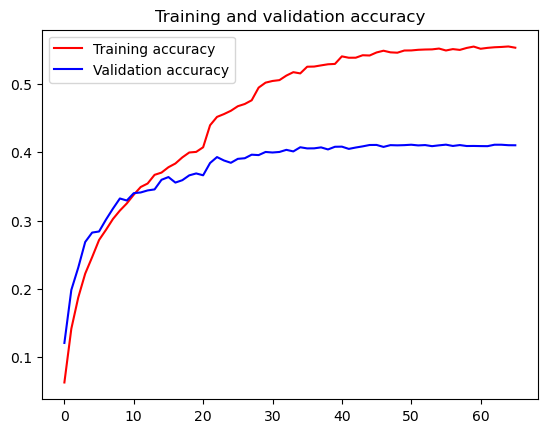

In [23]:
# Your code here
# Plot the training accuracy and validation accuracy with respect to epochs.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.show()

In [25]:
misclassified_indices = np.where(y_preds != y_true)
print(type(misclassified_indices))
print(len(misclassified_indices))
print(misclassified_indices)

<class 'tuple'>
1
(array([   0,    1,    5, ..., 9994, 9995, 9996], dtype=int64),)


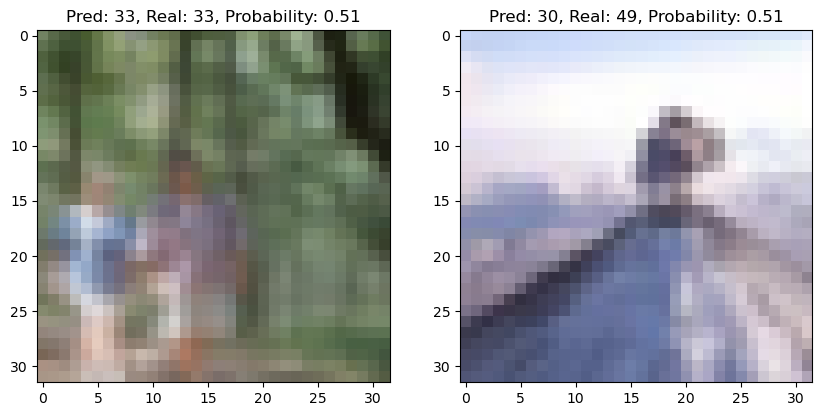

In [24]:
# Get correctly classified samples
classified_indices = np.where(y_preds == y_true)[0]
classified_probabilities = np.max(predicts[classified_indices], axis=-1)
# Take one value
classified_sample = x_test[classified_indices[0]]
classified_label = y_true[classified_indices[0]]

# Get the misclassified samples themselves
misclassified_indices = np.where(y_preds != y_true)[0]
misclassified_probabilities = np.max(predicts[classified_indices], axis=-1)
# Take one value
misclassified_sample = x_test[misclassified_indices[0]]
misclassified_label = y_preds[misclassified_indices[0]]

fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
axes[0].imshow(classified_sample)
axes[0].set_title(f"Pred: {classified_label}, Real: {y_true[classified_indices[0]]}, Probability: {classified_probabilities[0]:.2f}")

axes[1].imshow(misclassified_sample)
axes[1].set_title(f"Pred: {y_preds[misclassified_indices[0]]}, Real: {y_true[misclassified_indices[0]]}, Probability: {misclassified_probabilities[0]:.2f}")

# Removing axis labels
# axes[0].set_xticks([])
# axes[1].set_yticks([])
    
plt.show()

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
> I will use Transfer Learning that is assume to take a pre-trained model and re-train some of the layers on my dataset.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [27]:
'''
Variant #1:
Apply Transsfer Leasrning to improve the model Accuracy


This approach gave bad result. The model does not learn at all.
'''

from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.optimizers import Adam, RMSprop
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout

pre_trained_model = None
pre_trained_model = ResNet50(input_shape=(32, 32, 3),
                             include_top=False,
                             weights='imagenet',
                             classes=100,
                             classifier_activation='softmax')

for layer in pre_trained_model.layers:
    layer.trainable = False

pre_trained_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [29]:
# last_layer = pre_trained_model.get_layer('conv2_block3_add')
# last_layer = pre_trained_model.get_layer('conv3_block4_add')
last_layer = pre_trained_model.get_layer('conv2_block1_1_bn')


print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output


x = Conv2D(128, (3, 3), activation='relu')(last_output)
x = MaxPool2D(2,2)(x)
x = Dropout(0.5)(x)
    
    
# x = Conv2D(128, (3, 3), activation='relu')(x)
# x = MaxPool2D(2, 2)(x)
# x = Dropout(0.5)(x)
        
# x = Conv2D(256, (3, 3), activation='relu')(x)
# x = MaxPool2D(2, 2)(x)
        
x = Flatten()(x)
    
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(100, activation='softmax')(x)


# Append the dense network to the base model
model = None
model = Model(pre_trained_model.input, x)

# Print the model summary. See your dense network connected at the end.
model.summary()

last layer output shape:  (None, 8, 8, 64)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)         0         
                                                                 
 conv1_conv (Conv2D)         (None, 16, 16, 64)        9472      
                                                                 
 conv1_bn (BatchNormalizatio  (None, 16, 16, 64)       256       
 n)                                                              
                                                                 
 conv1_relu (Activation)     (None, 16, 16, 64)        0         
                                                                 
 pool1_pad (ZeroPadding2D)   (None, 18, 18, 64)        0         
                

In [30]:
# Set the training parameters
model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [31]:
# Train the model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

history = model.fit(x_training, y_training, validation_data=(x_validation, y_validation), epochs=100, batch_size=32,
                    callbacks=[early_stopping, reduce_lr])
# history = model.fit(x_training, y_training, validation_data=(x_validation, y_validation), epochs=15, batch_size=32, verbose=1)

Epoch 1/100
1250/1250 [==============================] - 11s 9ms/step - loss: 4.6087 - accuracy: 0.0083 - val_loss: 4.6060 - val_accuracy: 0.0088 - lr: 0.0010
Epoch 2/100
1250/1250 [==============================] - 9s 7ms/step - loss: 4.6058 - accuracy: 0.0093 - val_loss: 4.6065 - val_accuracy: 0.0088 - lr: 0.0010
Epoch 3/100
1250/1250 [==============================] - 9s 7ms/step - loss: 4.6058 - accuracy: 0.0092 - val_loss: 4.6067 - val_accuracy: 0.0086 - lr: 0.0010
Epoch 4/100
1250/1250 [==============================] - 10s 8ms/step - loss: 4.6058 - accuracy: 0.0098 - val_loss: 4.6067 - val_accuracy: 0.0087 - lr: 0.0010
Epoch 5/100
1250/1250 [==============================] - 9s 8ms/step - loss: 4.6057 - accuracy: 0.0099 - val_loss: 4.6069 - val_accuracy: 0.0086 - lr: 0.0010
Epoch 6/100
1250/1250 [==============================] - 10s 8ms/step - loss: 4.6057 - accuracy: 0.0092 - val_loss: 4.6070 - val_accuracy: 0.0086 - lr: 0.0010
Epoch 7/100
1250/1250 [==========================

In [ ]:
# =====================================================================

In [35]:
'''
Variant #2
Use DNN from scratch. Add more hidden layers, Dropout and BatchNormalization laters
'''

from keras.models import Model
from keras.optimizers import Adam, RMSprop
# from keras.models import Sequential
from keras.layers import Dense, Dropout, Normalization, BatchNormalization, Activation, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Input

model = None

input = Input(shape=(32, 32, 3))
x = Conv2D(256, (3, 3))(input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2,2)(x)
x = Dropout(0.5)(x)
    

x = Conv2D(128, (3, 3))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2,2)(x)
x = Dropout(0.4)(x)

        
x = Conv2D(128, (3, 3))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2,2)(x)
x = Dropout(0.4)(x)
       

x = Flatten()(x)

    
x = Dense(256)(x)
x = Activation('relu')(x)
x = Dropout(0.3)(x)

x = Dense(100, activation='softmax')(x)

model = Model(inputs=input, outputs=x)
model.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 30, 30, 256)       7168      
                                                                 
 batch_normalization_3 (Batc  (None, 30, 30, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 30, 30, 256)       0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 256)      0         
 2D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 15, 15, 256)       0   

In [33]:
# Set the training parameters
model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [34]:
# Your code here
# Train the model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

history = model.fit(x_training, y_training, validation_data=(x_validation, y_validation), epochs=100, batch_size=32,
                    callbacks=[early_stopping, reduce_lr], verbose=1)
# history = model.fit(x_training, y_training, validation_data=(x_validation, y_validation), epochs=15, batch_size=32, verbose=1)

Epoch 1/100
1250/1250 [==============================] - 16s 12ms/step - loss: 4.1618 - accuracy: 0.0690 - val_loss: 3.8891 - val_accuracy: 0.0950 - lr: 0.0010
Epoch 2/100
1250/1250 [==============================] - 14s 12ms/step - loss: 3.7048 - accuracy: 0.1294 - val_loss: 3.7955 - val_accuracy: 0.1160 - lr: 0.0010
Epoch 3/100
1250/1250 [==============================] - 15s 12ms/step - loss: 3.4658 - accuracy: 0.1667 - val_loss: 3.3969 - val_accuracy: 0.1897 - lr: 0.0010
Epoch 4/100
1250/1250 [==============================] - 14s 12ms/step - loss: 3.3015 - accuracy: 0.1939 - val_loss: 3.1705 - val_accuracy: 0.2246 - lr: 0.0010
Epoch 5/100
1250/1250 [==============================] - 15s 12ms/step - loss: 3.1629 - accuracy: 0.2198 - val_loss: 2.9021 - val_accuracy: 0.2748 - lr: 0.0010
Epoch 6/100
1250/1250 [==============================] - 14s 11ms/step - loss: 3.0593 - accuracy: 0.2367 - val_loss: 3.0762 - val_accuracy: 0.2488 - lr: 0.0010
Epoch 7/100
1250/1250 [=================

In [36]:
'''
Variant #3
More convolution layers
'''

# Build the CNN model
model = None
model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

history = model.fit(x_training, y_training, validation_data=(x_validation, y_validation), epochs=100, batch_size=32,
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/100
1250/1250 [==============================] - 16s 12ms/step - loss: 4.1431 - accuracy: 0.0664 - val_loss: 3.6859 - val_accuracy: 0.1332 - lr: 0.0010
Epoch 2/100
1250/1250 [==============================] - 14s 12ms/step - loss: 3.5481 - accuracy: 0.1457 - val_loss: 3.2377 - val_accuracy: 0.1983 - lr: 0.0010
Epoch 3/100
1250/1250 [==============================] - 15s 12ms/step - loss: 3.1982 - accuracy: 0.2041 - val_loss: 2.7894 - val_accuracy: 0.2823 - lr: 0.0010
Epoch 4/100
1250/1250 [==============================] - 15s 12ms/step - loss: 2.9650 - accuracy: 0.2461 - val_loss: 2.6772 - val_accuracy: 0.3000 - lr: 0.0010
Epoch 5/100
1250/1250 [==============================] - 15s 12ms/step - loss: 2.7935 - accuracy: 0.2768 - val_loss: 2.5012 - val_accuracy: 0.3356 - lr: 0.0010
Epoch 6/100
1250/1250 [==============================] - 15s 12ms/step - loss: 2.6750 - accuracy: 0.3036 - val_loss: 2.4591 - val_accuracy: 0.3569 - lr: 0.0010
Epoch 7/100
1250/1250 [=================

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np


# Predict results:
predicts = model.predict(x_test) # Numpy array of probabilities for all 100 classes (10000 samples)

y_preds = np.argmax(predicts, axis=-1) # Numpy array of predicted classes
print(f'Shape of prediction: {y_preds.shape}')

# Convert one-hot-encoded labels to class indices
y_true = np.argmax(y_test, axis=-1)
print(f'Shape of ground truth: {y_true.shape}')

# Calculate Accuracy, Precision, Recall, and F1 Score
accuracy = accuracy_score(y_true, y_preds)
precision = precision_score(y_true, y_preds, average='macro')
recall = recall_score(y_true, y_preds, average='macro')
f1 = f1_score(y_true, y_preds, average='macro')

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

313/313 [==============================] - 1s 4ms/step
Shape of prediction: (10000,)
Shape of ground truth: (10000,)
Accuracy: 0.57
Precision: 0.57
Recall: 0.57
F1 Score: 0.57


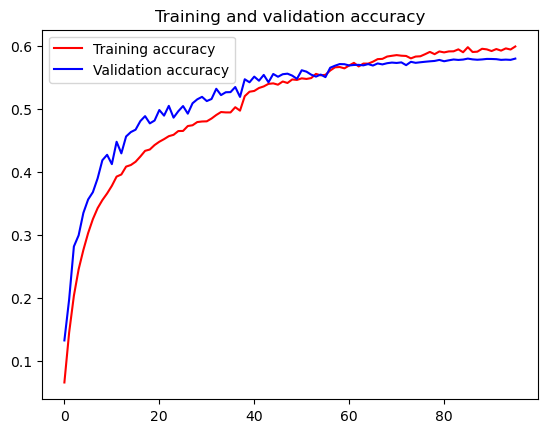

In [38]:
# Plot the training accuracy and validation accuracy with respect to epochs.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.show()

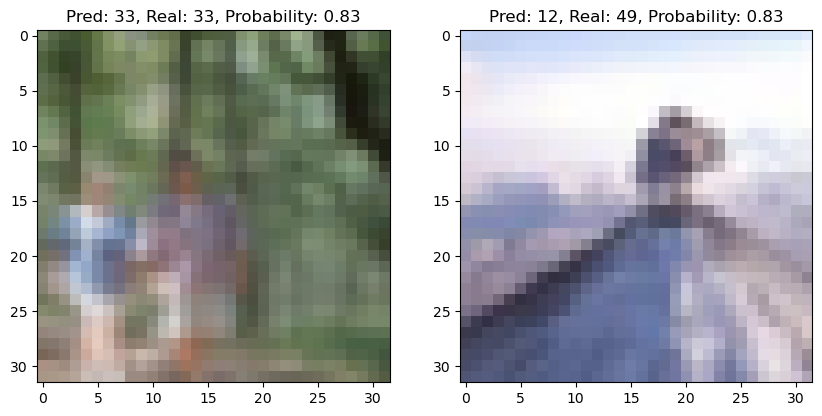

In [39]:
classified_indices = np.where(y_preds == y_true)[0]
classified_probabilities = np.max(predicts[classified_indices], axis=-1)
# Take one value
classified_sample = x_test[classified_indices[0]]
classified_label = y_true[classified_indices[0]]

# Get the misclassified samples themselves
misclassified_indices = np.where(y_preds != y_true)[0]
misclassified_probabilities = np.max(predicts[classified_indices], axis=-1)
# Take one value
misclassified_sample = x_test[misclassified_indices[0]]
misclassified_label = y_preds[misclassified_indices[0]]

fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
axes[0].imshow(classified_sample)
axes[0].set_title(f"Pred: {classified_label}, Real: {y_true[classified_indices[0]]}, Probability: {classified_probabilities[0]:.2f}")

axes[1].imshow(misclassified_sample)
axes[1].set_title(f"Pred: {y_preds[misclassified_indices[0]]}, Real: {y_true[misclassified_indices[0]]}, Probability: {misclassified_probabilities[0]:.2f}")

# Removing axis labels
# axes[0].set_xticks([])
# axes[1].set_yticks([])
    
plt.show()

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here
> 1. Since accuracy, precision, recall, and F1-score are all the same, it suggests that the predictions are relatively well-balanced across the classes, with no extreme bias toward a specific class or set of classes.
> 2. Model's performance has been defenitly improved.
> 3. It is because the last one is moderately complex deep neural network compared to the forst one.
> 4. I think there is a room for further improvement since I have not implemented Data Augmentation and Transfer Learning Techniques.
> 5. If I had time I would try implementing: Data Augmentation - increase the variety of the training data by applying transformations like random crops, rotations, flips, and brightness adjustments. Model Architecture Improvements: add more layers or units in the dense layers to increase capacity; experiment with different CNN architectures like ResNet, EfficientNet, or DenseNet; Experiment with advanced optimizers like AdamW or RMSprop; Adjust hyperparameters like momentum or weight decay.
        

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.